## Practical Demonstration

Following my paper, I came across this dataset tracking a typical training week for a number of high-level running athletes. 

In [14]:
#pip install tensorflow

In [52]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

In [53]:
# Turn off warnings
import warnings
warnings.filterwarnings("ignore")

### Section 1: Data Exploration

In [54]:
# Read the CSV file
df = pd.read_csv('Data.csv')

# Display 
df.head()

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,max training success.2,avg recovery.2,min recovery.2,max recovery.2,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
0,5.0,2.0,22.2,16.4,11.8,1.0,2.0,10.0,10.0,0.6,...,0.0,0.18,0.16,0.20,0,0,0.718447,1.378882,1.919255,0
1,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.18,0.16,0.20,0,0,0.683544,1.018868,1.490566,1
2,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,0.683544,1.018868,1.490566,2
3,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.18,0.16,0.18,0,0,0.683544,1.018868,1.490566,3
4,6.0,1.0,39.2,17.6,18.9,1.0,3.0,17.2,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,2.202247,1.361111,0.618056,4


In [55]:
df.shape
#df.columns.tolist()
#df.info()

(42798, 72)

In [56]:
# Searching for missing values
total_missing_values = df.isnull().sum().sum()
print("\nTotal Missing Values in the DataFrame:", total_missing_values)


Total Missing Values in the DataFrame: 0


In [57]:
grouped_df = df.groupby('Athlete ID').agg({
    'nr. sessions': 'mean',
    'total kms': 'mean',
    'injury': 'max', 
})

#Reset index
grouped_df.reset_index(inplace=True)

#grouped_df

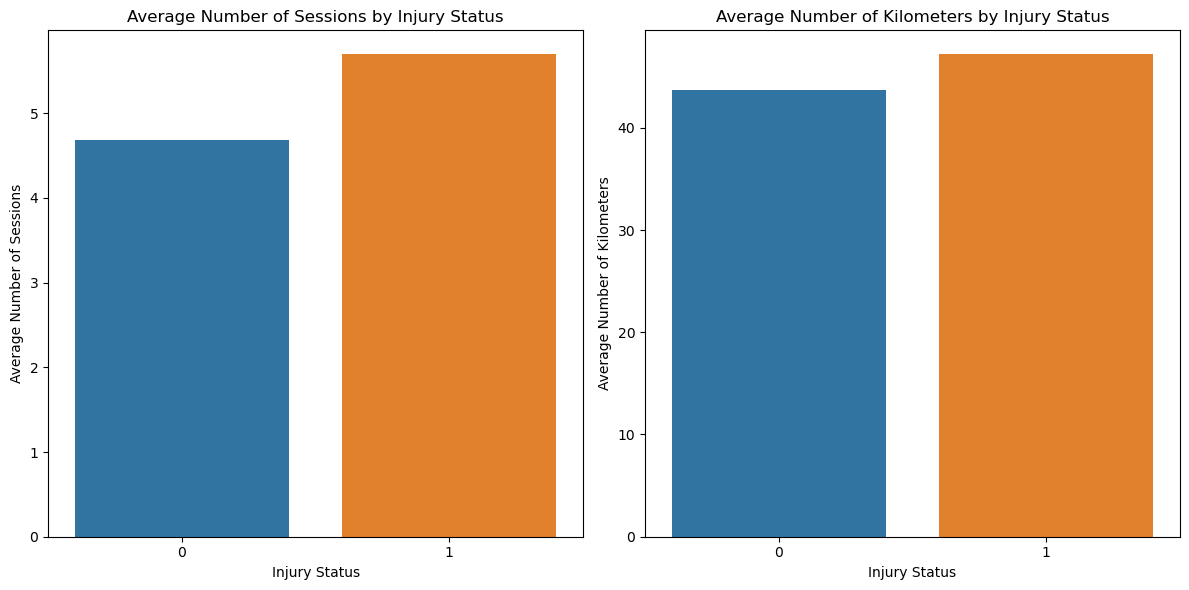

In [58]:
# Size
plt.figure(figsize=(12, 6))

# Plot ave number of sessions
plt.subplot(1, 2, 1)
sns.barplot(x='injury', y='nr. sessions', data=grouped_df, ci=None)
plt.title('Average Number of Sessions by Injury Status')
plt.xlabel('Injury Status')
plt.ylabel('Average Number of Sessions')

# Plot ave number of kilometers
plt.subplot(1, 2, 2)
sns.barplot(x='injury', y='total kms', data=grouped_df, ci=None)
plt.title('Average Number of Kilometers by Injury Status')
plt.xlabel('Injury Status')
plt.ylabel('Average Number of Kilometers')

#Display
plt.tight_layout()
plt.show()

In [59]:
# Display the counts
injury_counts = df['injury'].value_counts()
print("Number of injuries (1):", injury_counts[1])
print("Number of no injuries (0):", injury_counts[0])

Number of injuries (1): 575
Number of no injuries (0): 42223


### Section 2: Neural Network Modelling

In [69]:
# Extract target variable
X = df.drop(columns=['Athlete ID', 'injury', 'Date'])  
y = df['injury']

In [70]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
# Standardise
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
# A simple neural network
model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Assuming 'model' is your Sequential model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

# Evaluate the model
accuracy = model.evaluate(X_test, y_test)[1]
print("Model Accuracy:", accuracy)

Epoch 1/10
749/749 [==============================] - 2s 2ms/step - loss: 0.0963 - accuracy: 0.9771 - val_loss: 0.0678 - val_accuracy: 0.9878
Epoch 2/10
749/749 [==============================] - 1s 2ms/step - loss: 0.0757 - accuracy: 0.9855 - val_loss: 0.0683 - val_accuracy: 0.9878
Epoch 3/10
749/749 [==============================] - 1s 2ms/step - loss: 0.0734 - accuracy: 0.9855 - val_loss: 0.0657 - val_accuracy: 0.9878
Epoch 4/10
749/749 [==============================] - 1s 2ms/step - loss: 0.0712 - accuracy: 0.9855 - val_loss: 0.0657 - val_accuracy: 0.9878
Epoch 5/10
749/749 [==============================] - 1s 2ms/step - loss: 0.0696 - accuracy: 0.9855 - val_loss: 0.0671 - val_accuracy: 0.9878
Epoch 6/10
749/749 [==============================] - 2s 2ms/step - loss: 0.0674 - accuracy: 0.9856 - val_loss: 0.0676 - val_accuracy: 0.9878
Epoch 7/10
749/749 [==============================] - 1s 2ms/step - loss: 0.0656 - accuracy: 0.9855 - val_loss: 0.0673 - val_accuracy: 0.9878
Epoch 

402/402 [==============================] - 1s 1ms/step


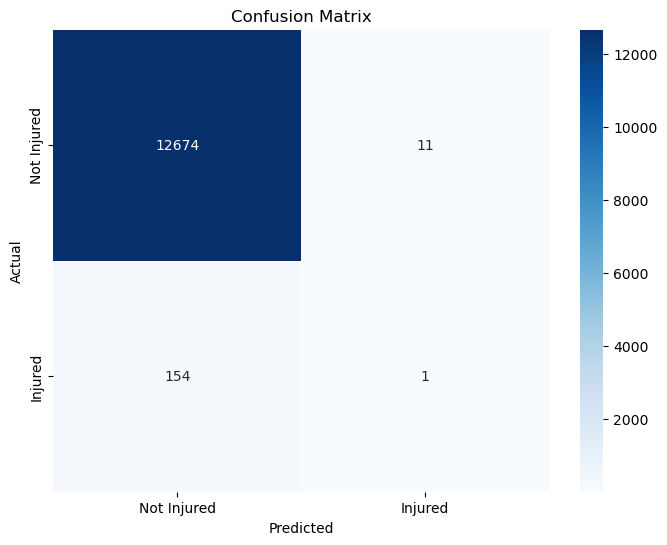

In [64]:
# Make predictions
y_prob = model.predict(X_test)
y_pred = (y_prob > 0.5).astype(int)

# Confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plot 
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Not Injured', 'Injured'], 
            yticklabels=['Not Injured', 'Injured'])


plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy is not the best way to view this model given the class imbalance

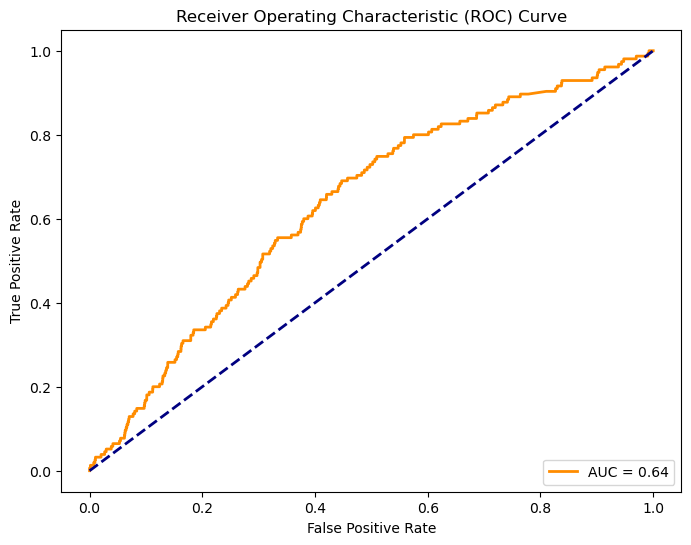

In [65]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

ROC of 0.64 suggests that the model has a moderate discriminative ability

In [66]:
# Make predictions
y_pred = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate precision
precision = precision_score(y_test, y_pred_binary)

print("Model Precision:", precision)

402/402 [==============================] - 0s 1ms/step
Model Precision: 0.08333333333333333


### Section 3: Balancing Classes

In [67]:
# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight = dict(zip(np.unique(y_train), class_weights))

# Compile the model with class weights
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with class weights
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, class_weight=class_weight)

# Evaluate the model
accuracy = model.evaluate(X_test, y_test)[1]
print("Model Accuracy:", accuracy)

# Make predictions
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

Epoch 1/10
749/749 [==============================] - 2s 2ms/step - loss: 0.5558 - accuracy: 0.8330 - val_loss: 0.4358 - val_accuracy: 0.7999
Epoch 2/10
749/749 [==============================] - 1s 2ms/step - loss: 0.4556 - accuracy: 0.8188 - val_loss: 0.4179 - val_accuracy: 0.8279
Epoch 3/10
749/749 [==============================] - 2s 2ms/step - loss: 0.4209 - accuracy: 0.8228 - val_loss: 0.3662 - val_accuracy: 0.8461
Epoch 4/10
749/749 [==============================] - 1s 2ms/step - loss: 0.3980 - accuracy: 0.8375 - val_loss: 0.3692 - val_accuracy: 0.8565
Epoch 5/10
749/749 [==============================] - 1s 2ms/step - loss: 0.3685 - accuracy: 0.8374 - val_loss: 0.5116 - val_accuracy: 0.7528
Epoch 6/10
749/749 [==============================] - 1s 2ms/step - loss: 0.3541 - accuracy: 0.8422 - val_loss: 0.3690 - val_accuracy: 0.8435
Epoch 7/10
749/749 [==============================] - 1s 2ms/step - loss: 0.3298 - accuracy: 0.8554 - val_loss: 0.4942 - val_accuracy: 0.7735
Epoch 

In [68]:
# Calculate precision
precision = precision_score(y_test, y_pred_binary)
print("Model Precision:", precision)

Model Precision: 0.02037617554858934
